### View model results and calibration

In [1]:
from __future__ import print_function
import os
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf
import numpy as np
import pandas as pd
from p9model import problem9model
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### import some convenience functions from ```functions.py``` for making plots

In [2]:
from functions import one2one, plot_residuals, plot_heads, plot_results

#### First run the model once with the starting values using the ```problem9model``` class

In [3]:
p9m = problem9model(basename='P9_1', model_ws='modelfiles')
print('Kh sand: {:.1f} m/d, Kh silt: {:.1f} m/d'.format(*p9m.Khvalues.values()))
p9m.create_input()

Kh sand: 75.0 m/d, Kh silt: 1.0 m/d


In [4]:
#p9m.m.run_model()

### importing model results

In [5]:
#Create the binary output objects
path = 'modelfiles'
headobj = bf.HeadFile(os.path.join(path, 'P9_1.hds'))
cbobj = bf.CellBudgetFile(os.path.join(path, 'P9_1.cbc'))

heads = headobj.get_data()

#### Now extract the head results at the observation locations:

In [6]:
# bring in observation info
obs = pd.read_csv('observations.csv')
obs

,Well,Row,Column,Head1,Head2,Head3,Y,X
0,P,3,4,509.12,509.11,508.53,1250,350
1,G,5,8,508.19,507.99,506.84,1050,750
2,F,5,11,508.17,507.79,506.25,1050,1050
3,N,6,4,512.83,512.83,509.78,950,350
4,J,7,2,515.71,515.71,511.62,850,150
5,E,7,8,513.17,513.04,507.68,850,750
6,A,7,11,512.22,508.80,507.27,850,1050
7,B,7,14,511.95,511.29,507.63,850,1350
8,K,8,11,513.24,512.21,507.76,750,1050
9,Q,9,7,518.32,518.18,510.00,650,650


In [7]:
#Set some plotting parameters
levels = np.arange(503, 518, 1)
extent = [0, 1500, 0, 1500]
print ('Levels: ', levels)
print ('Extent: ', extent)

Levels:  [503 504 505 506 507 508 509 510 511 512 513 514 515 516 517]
Extent:  [0, 1500, 0, 1500]


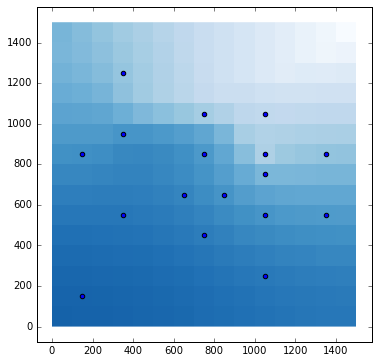

In [8]:
# show the observation locations with the head field
fig, ax = plt.subplots()
ax.imshow(heads[0,:,:], extent=extent, interpolation='none',
          cmap='Blues', vmin=503, vmax=518)
ax.scatter(obs.X, obs.Y)

In [9]:
# get simulated values at observation locations
obs['simulated'] = [heads[0, obs.Row[i], obs.Column[i]] for i in range(len(obs))]

#### Calculate mean error,  mean absolute error and rms error
<img src="files/images/me.png", align='left'>
<img src="files/images/ame.png", align='left'>
<img src="files/images/rms.png", align='left'>

In [10]:
obs['residuals'] = obs.simulated - obs.Head1
me = np.mean(obs.residuals)
mea = np.mean(np.abs(obs.residuals))
rmse = np.sqrt(np.mean(obs.residuals**2))
print ('Mean Error: {:.2f}\nMean Absolute Error: {:.2f}\nRMS Error: {:.2f}'.format(me, mea, rmse))

Mean Error: -2.99
Mean Absolute Error: 3.21
RMS Error: 3.79


### Make one to one plot of residuals

<imgsrc="images/me.png">

In [11]:
obs

,Well,Row,Column,Head1,Head2,Head3,Y,X,simulated,residuals
0,P,3,4,509.12,509.11,508.53,1250,350,508.468018,-0.651982
1,G,5,8,508.19,507.99,506.84,1050,750,509.943665,1.753665
2,F,5,11,508.17,507.79,506.25,1050,1050,507.814972,-0.355028
3,N,6,4,512.83,512.83,509.78,950,350,512.980408,0.150408
4,J,7,2,515.71,515.71,511.62,850,150,513.074036,-2.635964
5,E,7,8,513.17,513.04,507.68,850,750,511.510742,-1.659258
6,A,7,11,512.22,508.80,507.27,850,1050,509.899994,-2.320006
7,B,7,14,511.95,511.29,507.63,850,1350,510.015381,-1.934619
8,K,8,11,513.24,512.21,507.76,750,1050,511.002441,-2.237559
9,Q,9,7,518.32,518.18,510.00,650,650,513.100586,-5.219414


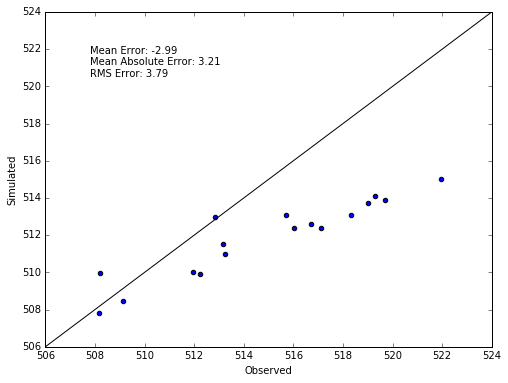

In [12]:
one2one(obs.Head1, obs.simulated)

### Now make spatial plot of residuals

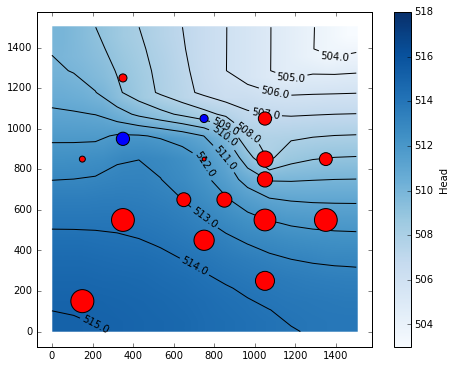

In [13]:
# oversimulated
size_factor = 100
over = obs[obs.residuals > 0]
under = obs[obs.residuals < 0]

# plot the heads
ax = plot_heads(heads[0,:,:], levels, extent)

# plot the residuals on top
plt.scatter(over.X, over.Y, s=np.abs(obs.residuals) * size_factor, c='b', zorder=100)
plt.scatter(under.X, under.Y, s=np.abs(obs.residuals) * size_factor, c='r', zorder=100)

### Compare River leakance to observed values


In [14]:
# get the river leakage results from the output binary file for stress_period 1
# show the records
riv_output = cbobj.get_data(totim=1, text='   RIVER LEAKAGE')
riv_output

[rec.array([(1, 2308.7646484375), (2, -685.5286254882812), (3, -1059.7708740234375),
  (4, -974.8074340820312), (5, -781.1375122070312), (6, -588.28955078125),
  (7, -428.0404968261719), (23, -1033.933349609375),
  (39, -2632.01025390625), (40, -4494.31640625), (41, -5871.56640625),
  (42, -10321.4521484375), (28, -4079.739990234375), (29, -8883.4013671875),
  (15, -5461.41748046875)], 
           dtype=[('node', '<i4'), ('q', '<f4')])]

In [15]:
# make into a pandas DataFrame for readability
rldf = pd.DataFrame(riv_output[0])

# designate the state as gaining or losing
rldf['state'] = ['gaining' if q < 0 else 'losing' for q in rldf.q]
rldf

,node,q,state
0,1,2308.764648,losing
1,2,-685.528625,gaining
2,3,-1059.770874,gaining
3,4,-974.807434,gaining
4,5,-781.137512,gaining
5,6,-588.289551,gaining
6,7,-428.040497,gaining
7,23,-1033.933350,gaining
8,39,-2632.010254,gaining
9,40,-4494.316406,gaining


In [16]:
# sum the leakage to the river, and the leakage out of the river
r_out = rldf.loc[rldf.state == 'gaining', 'q'].sum()
r_in = rldf.loc[rldf.state == 'losing', 'q'].sum()

print ('Total River Leakage In: {}\nTotal River Leakage Out: {}'.format(r_in, r_out))

Total River Leakage In: 2308.76464844
Total River Leakage Out: -47295.4101562


The river leakage values should agree with those in the list file for stress period 1 (check that the files aren't mixed up!)

### Manual steady-state calibration
Manual calibration can be performed using the ```problem9model``` class to adjust input parameters and then recreate the model input files

With the initial K value of 75 m/d for sand (and assumed k of 1 m/d for silt), the simulated heads are low, suggesting that K might be too high

simulated river exchange values are too high, also might indicate too high of K

#### Manual iteration 2
drop K for sand (Khvalues[1]) from 75 m/d to 10 m/d


In [17]:
p9m = problem9model(basename='P9_2', model_ws='modelfiles')
p9m.Khvalues[1] = 10
print('Kh sand: {:.1f} m/d, Kh silt: {:.1f} m/d'.format(*p9m.Khvalues.values()))
p9m.create_input()
#p9m.m.run_model()

Kh sand: 10.0 m/d, Kh silt: 1.0 m/d


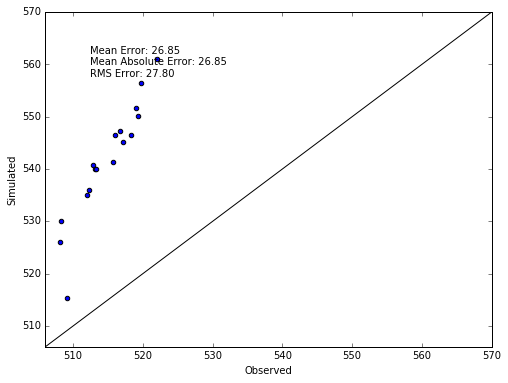

In [18]:
#bring in results
headobj = bf.HeadFile('modelfiles/P9_2.hds')
head = headobj.get_data(totim=1)

# get simulated values at observation locations
obs['simulated'] = [head[0, obs.Row[i], obs.Column[i]] for i in range(len(obs))]
one2one(obs.Head1, obs.simulated)

#### Manual iteration 3
sand = 60 m/d; silt = 1 m/d

In [19]:
p9m = problem9model(basename='P9_3', model_ws='modelfiles')
p9m.Khvalues[1] = 60
print('Kh sand: {:.1f} m/d, Kh silt: {:.1f} m/d'.format(*p9m.Khvalues.values()))
p9m.create_input()
#p9m.m.run_model()

Kh sand: 60.0 m/d, Kh silt: 1.0 m/d


Total River Leakage In: 651.660400391
Total River Leakage Out: -45638.3046875


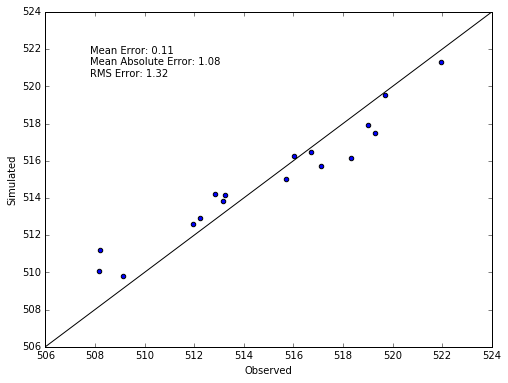

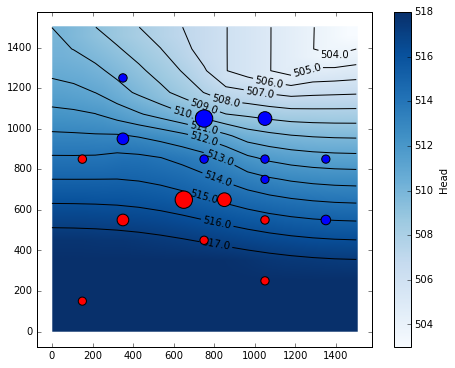

In [20]:
plot_results('modelfiles/P9_3')

#### Manual iteration 4
sand = 45 m/d; silt = 15 m/d  
this value for 50% silt and clay is way to high in my opinion, unless there are connected sand and gravel seems through it, but it produces the best fit

In [21]:
p9m = problem9model(basename='P9_4', model_ws='modelfiles')
p9m.Khvalues[1] = 45
p9m.Khvalues[2] = 15
print('Kh sand: {:.1f} m/d, Kh silt: {:.1f} m/d'.format(*p9m.Khvalues.values()))
p9m.create_input()
#p9m.m.run_model()

Kh sand: 45.0 m/d, Kh silt: 15.0 m/d


Total River Leakage In: 651.660400391
Total River Leakage Out: -45638.3046875


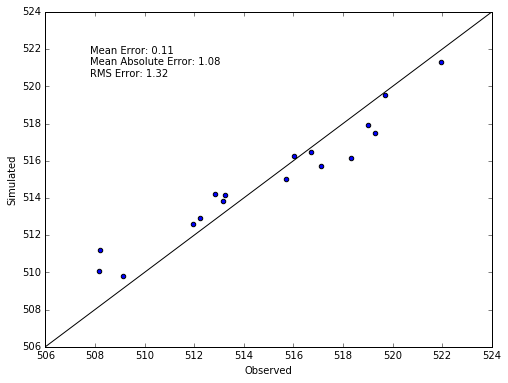

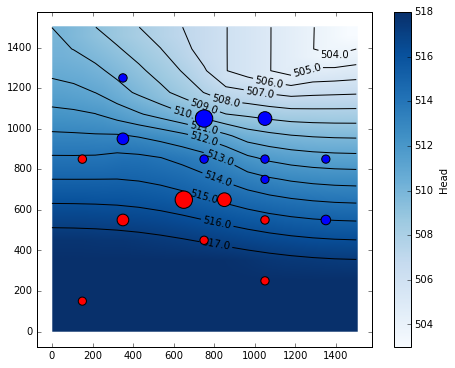

In [22]:
plot_results('modelfiles/P9_4')

#### Manual iteration 5
sand = 45 m/d; silt = 1 m/d

In [23]:
p9m = problem9model(basename='P9_5', model_ws='modelfiles')
p9m.Khvalues[1] = 45
p9m.Khvalues[2] = 1
print('Kh sand: {:.1f} m/d, Kh silt: {:.1f} m/d'.format(*p9m.Khvalues.values()))
p9m.create_input()
#p9m.m.run_model()

Kh sand: 45.0 m/d, Kh silt: 1.0 m/d


Total River Leakage In: 120.276184082
Total River Leakage Out: -45106.921875


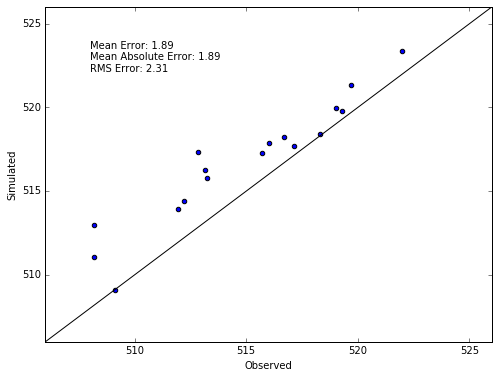

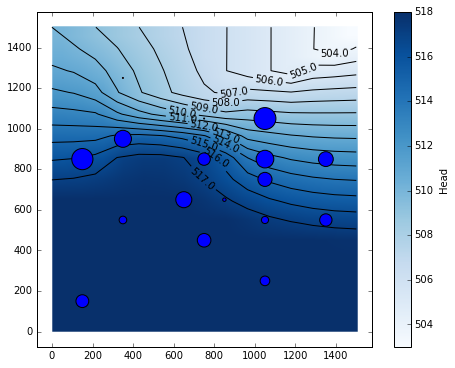

In [24]:
plot_results('modelfiles/P9_5')

### Transient Zoned Calibration with PEST
 * 4 parameters: Ksand, Ksilt, Rcond, and sy (specific yield)
 * created template files by pasting parameter names into existing upw and riv files  
     * see ```P9Tcal_upw.tpl``` and ```P9cal_riv.tpl```
 * created simple python script to extract head values and river conductance, and output these to text file  
     * see ```get_resultsT.py```
 * created a instruction file for PEST to read python script output  
     * see ```resultsT_txt.ins```
     
Pest is run by calling
```
>pest p9Tcal.pst
```
at the command line **(must have PEST installed and in the system path)**

##### Overview of PEST run for this model  
* ```p9Tcal.pst``` is the PEST control file. It instructs PEST to create model input from the template files, and execute the batch file (see ```P9T.bat```, listed in the PEST control file under  **model command line**). 
* In this case we are also telling pest to run the python script ```get_resultsT.py``` to post-process the model results. 
* Lastly, the PEST control file tells PEST how to read the model outputs, using the instruction file (```resultsT_txt.ins```).

For more information about PEST, see the manual at: http://www.pesthomepage.org/Downloads.php


Observation weights:

    Head errors         stdev	error	weight 
    measurement_error	0.002	        500
    survey_error	     0.02		     50
    total	            0.022		    550
            
    River flux errors			
    toRiver	          0.1	 4555	 2.20E-04
    fromRiver	        0.1	 35	   2.86E-02
 
    
Starting objective function:  

   Sum of squared weighted residuals (ie phi)               =  4.07432E+07
   Contribution to phi from observation group "heads"       =  2.79688E+07
   Contribution to phi from observation group "rflux"       =  1.27744E+07  
    
Optimal parameter values:  
    
         rcond     48606.60000000000         1.000000         0.000000    
         ksand     44.04990000000000         1.000000         0.000000    
         ksilt     3.613410000000000         1.000000         0.000000    
            sy    0.1450755800000000         1.000000         0.000000     

### Run PEST
at the command line (as shown above) before executing the next cell

Total River Leakage In: 390.45489502
Total River Leakage Out: -45538.5976562


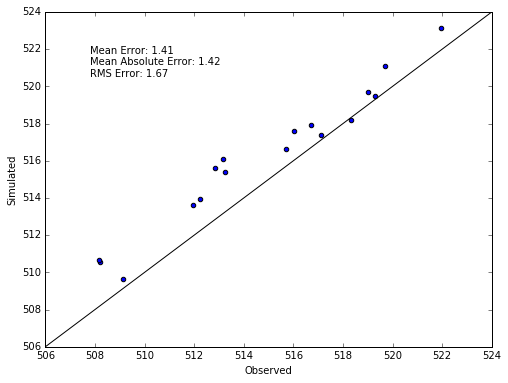

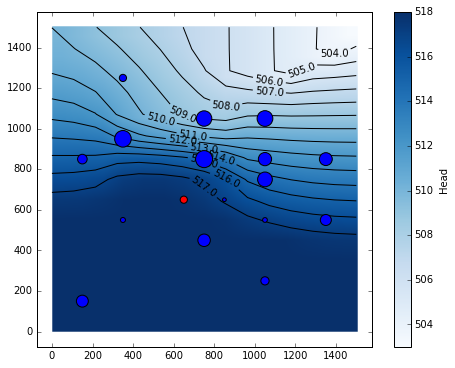

In [25]:
plot_results('modelfiles/P9Tcal')